In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt

air_data = pd.read_csv("datasets/AirQualityUCI/AirQualityUCI.csv", sep=';', engine='python')

In [2]:
air_data.head(15)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185,31,"3,6",690,62,1462,77,1333,733,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136,31,"3,3",672,62,1453,76,1333,730,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094,24,"2,3",609,45,1579,60,1276,620,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010,19,"1,7",561,-200,1705,-200,1235,501,"10,3","60,2","0,7517",NaN,NaN


In [3]:
unwanted_columns = ['Date', 'Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 
                    'PT08.S3(NOx)', 'PT08.S4(NO2)', 'Unnamed: 15', 'Unnamed: 16']
air_data = air_data.drop(unwanted_columns, axis=1) # drop unwanted columns

In [4]:
air_data.columns # columns which are left

Index(['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [5]:
len(air_data) # how many rows exist in the data

9357

In [6]:
# replace all the data sets which show -200 (empty) as NaN
air_data = air_data[~air_data.eq(-200)]

In [7]:
air_data = air_data[~air_data.eq('-200')]

c:\users\alfor\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
air_data.head(15)

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,"2,6",150.0,"11,9",166.0,113.0,1268.0,"13,6","48,9","0,7578"
1,2,112.0,"9,4",103.0,92.0,972.0,"13,3","47,7","0,7255"
2,"2,2",88.0,"9,0",131.0,114.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",80.0,"9,2",172.0,122.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",51.0,"6,5",131.0,116.0,1110.0,"11,2","59,6","0,7888"
5,"1,2",38.0,"4,7",89.0,96.0,949.0,"11,2","59,2","0,7848"
6,"1,2",31.0,"3,6",62.0,77.0,733.0,"11,3","56,8","0,7603"
7,1,31.0,"3,3",62.0,76.0,730.0,"10,7","60,0","0,7702"
8,"0,9",24.0,"2,3",45.0,60.0,620.0,"10,7","59,7","0,7648"
9,"0,6",19.0,"1,7",NaN,NaN,501.0,"10,3","60,2","0,7517"


In [9]:
# drop all rows with NaN
air_data = air_data.dropna()

In [10]:
len(air_data)

827

In [11]:
# use a one-time lambda function to make the data-set to string, replace ',' with '.' then convert to float
air_data = air_data.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', '.')))
air_data.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,1268.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,972.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,1074.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,1203.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,1110.0,11.2,59.6,0.7888


In [12]:
# check column data types
air_data.dtypes

CO(GT)         float64
NMHC(GT)       float64
C6H6(GT)       float64
NOx(GT)        float64
NO2(GT)        float64
PT08.S5(O3)    float64
T              float64
RH             float64
AH             float64
dtype: object

In [13]:
features = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
air_features = air_data[features]

In [14]:
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,2.6,150.0,11.9,166.0,113.0,13.6,48.9,0.7578
1,2.0,112.0,9.4,103.0,92.0,13.3,47.7,0.7255
2,2.2,88.0,9.0,131.0,114.0,11.9,54.0,0.7502
3,2.2,80.0,9.2,172.0,122.0,11.0,60.0,0.7867
4,1.6,51.0,6.5,131.0,116.0,11.2,59.6,0.7888


In [15]:
air_target = air_data[['PT08.S5(O3)']]

In [16]:
air_target.head()

,PT08.S5(O3)
0,1268.0
1,972.0
2,1074.0
3,1203.0
4,1110.0


In [17]:
# store columns in the scalable_cols variable
scalable_cols = air_features.columns

In [18]:
# set chained assignment warning to None since we will be overriding data
pd.options.mode.chained_assignment = None

In [19]:
# best-practice to standardize the numeric values being fed into the model 
# which allows stability during training phase.
# preprocessing.scale function standardizes by subtracting the col mean by all the elements
# then dividing all of them by the column standard deviation
air_features[scalable_cols] = preprocessing.scale(air_features[scalable_cols])

In [20]:
air_features.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T,RH,AH
0,0.174943,-0.388917,0.152273,0.275105,0.404769,-0.415033,-0.009843,-0.415098
1,-0.250998,-0.571315,-0.184943,-0.495252,-0.262432,-0.477243,-0.088493,-0.596154
2,-0.109018,-0.686514,-0.238897,-0.152871,0.436541,-0.767556,0.324418,-0.457699
3,-0.109018,-0.724913,-0.211920,0.348473,0.690713,-0.954186,0.717667,-0.253100
4,-0.534959,-0.864111,-0.576113,-0.152871,0.500084,-0.912712,0.691451,-0.241329


In [21]:
# since the training set is so large we use 95% for training and 5% for testing how our model performs
X_train, x_test, Y_train, y_test = train_test_split(air_features, 
                                                    air_target,
                                                    test_size=0.05,
                                                    random_state=0)

In [22]:
dtype = torch.float

In [23]:
# convert training and test data from pandas dataframes to 
# PyTorch floating point tensors using torch.tensor function
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

Y_train_tensor = torch.tensor(Y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [24]:
X_train_tensor.shape

torch.Size([785, 8])

In [25]:
Y_train_tensor.shape

torch.Size([785, 1])

In [26]:
# set up constants for the neural network
inp = 8 # number of input features = number of columns in training data
out = 1 # 1 output column which is ozone predicted
hid = 100 # hidden layer will have 100 neurons
loss_fn = torch.nn.MSELoss() # standard loss function used for linear regression
learning_rate = 0.0001

In [27]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), 
                            torch.nn.Sigmoid(), 
                            torch.nn.Linear(hid, out),
                           )

In [28]:
# run training for Nthousand epochs
for iter in range(1, 100001):
    y_pred = model(X_train_tensor) #on forward pass calc y_pred by applying a model to input training data
    loss = loss_fn(y_pred, Y_train_tensor) #calc loss by passing in y pred and y actual to loss_fn
    
    if iter % 10000 ==0: #print loss for every 1000 iter to see convergence of loss
        print(iter, int(loss.item()))
        
    model.zero_grad() # zero out gradient before backward pass
    loss.backward() # back propagtion pass
    
    #stop autograd from tracking history on newly created tensors by setting them inside a with block
    with torch.no_grad(): # do not want to calculate gradients when updating model parameters
        for param in model.parameters(): # param() function allows us to access all params in nn
            param -= learning_rate * param.grad # multiply learning rate and gradient to update params

10000 8160
20000 6823
30000 6037
40000 5547
50000 5199
60000 4850
70000 4614
80000 4424
90000 4266
100000 4133


In [29]:
sample = x_test.iloc[23] # grab a sample from the 23 col of the test data
sample

CO(GT)     -0.250998
NMHC(GT)   -0.206519
C6H6(GT)   -0.117500
NOx(GT)    -0.201782
NO2(GT)     0.404769
T           0.041172
RH         -0.068830
AH          0.140402
Name: 532, dtype: float64

In [30]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = dtype)
sample_tensor

tensor([-0.2510, -0.2065, -0.1175, -0.2018,  0.4048,  0.0412, -0.0688,  0.1404])

In [31]:
y_pred = model(sample_tensor)
print("Predicted air quality is : ", int(y_pred.item()))
print("Actual air quality is : ", int(y_test.iloc[23]))

Predicted air quality is :  1088
Actual air quality is :  1200


In [32]:
y_pred_tensor = model(x_test_tensor) # test predictions on full nn model

In [33]:
y_pred = y_pred_tensor.detach().numpy() # once we have prediction we detach and convert to numpy array

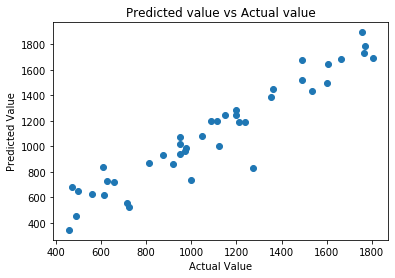

In [56]:
plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.title("Predicted value vs Actual value")
plt.show()

In [35]:
torch.save(model, 'my_model') # save the model

In [36]:
saved_model = torch.load('my_model') # load the model

In [37]:
y_pred_tensor = saved_model(x_test_tensor)

In [38]:
y_pred = y_pred_tensor.detach().numpy()

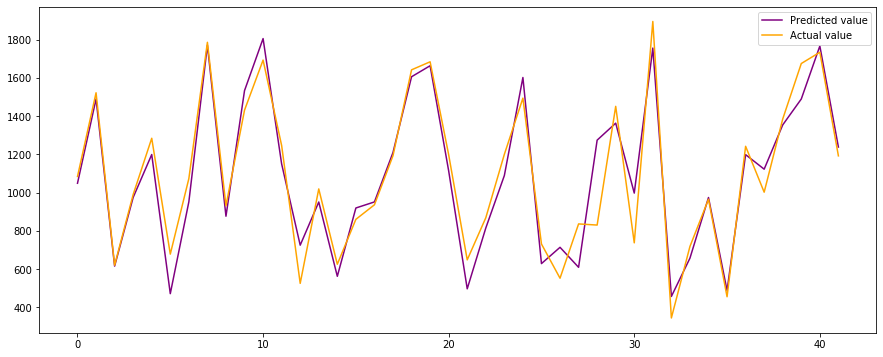

In [60]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label='Predicted value', color='purple')
plt.plot(y_test.values, label='Actual value', color='orange')

plt.legend()
plt.show()